In [1]:
import pandas            as pd
import numpy             as np
import scipy.optimize    as optim
import matplotlib.pyplot as plt
import math
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def exemploLog(t, a, b, c):
    return c / (1 + a * np.exp(-b * t) )

In [3]:
# Baixar DataSet
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv')
# Converter Data e Float
df['Date'] = pd.to_datetime(df['Date'])
df['Confirmed'] = df['Confirmed'].astype(float)
# Filtrar apenas colunas desejadas
df = df.filter(items=['Date', 'Country','Confirmed'])
# Filtrar o pais de analise
df = df[df['Country'] == 'China']
# Tranformar e ordernas dataset pela data
df = df.set_index('Date').sort_index()
# Obter a soma diaria dos casos por dia 
# (no caso de mais de uma anotação mesmo dia junta e soma)
df = df.resample('D').sum().dropna()
# Voltar indice para campo
df = df.reset_index(drop=False)
df.head()

,Date,Confirmed
0,2020-01-22,548.0
1,2020-01-23,643.0
2,2020-01-24,920.0
3,2020-01-25,1406.0
4,2020-01-26,2075.0


In [4]:
df = df.filter(items=['Date','Confirmed'])
df.head()

,Date,Confirmed
0,2020-01-22,548.0
1,2020-01-23,643.0
2,2020-01-24,920.0
3,2020-01-25,1406.0
4,2020-01-26,2075.0


In [23]:
# Inicializar a, b, c de forma aleatoria
p0 = np.random.exponential(size=3)
print('a b c aleatorios = ', p0)
# bound de valor minimo fixo e para valor maximo 
bounds = (0, [100000., 1000., 1000000000.])
# Copiar apenas os numeros de confirmados do dataset principal
data = pd.DataFrame(df['Confirmed'].values)
data = data.reset_index(drop=False)
# Utilizar assim para numerar os dias 
# ao inves de data utilizar numero do dia 01 02 ...80 81 etc...
data.columns = ['Day', 'Confirmed']
x = np.array(data['Day']) + 1
y = np.array(data['Confirmed'])
# Otimização dos minimos quadrados não lineares,
# atraves da biblioteca scipy.optimize que retorna a b c 
# que minimizam o erro dos minimos quadrados
(a,b,c),cov = optim.curve_fit(exemploLog, x, y, bounds=bounds, p0=p0)
print( 'a=', a,  'b=', b, 'c=', c )

# fig = plt.figure()
# ax = fig.gca()
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
# plt.plot(x, y)


a b c aleatorios =  [1.79447119 2.15384728 1.52129693]
a= 61.378603568927026 b= 0.21826351119054233 c= 81562.34807685633


a= 61.378603568927026 b= 0.21826351119054233 c= 81562.34807685633


Text(0, 0.5, 'confirmados')

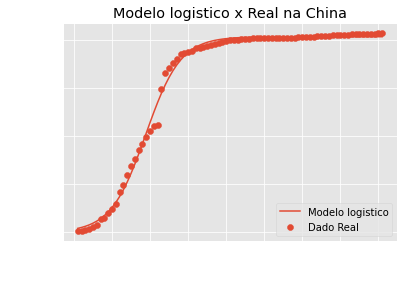

In [24]:
print( 'a=', a,  'b=', b, 'c=', c )
fig = plt.figure()
ax = fig.gca()
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
plt.scatter(x, y)
plt.plot(x, exemploLog(x, a, b, c))
plt.title('Modelo logistico x Real na China')
plt.legend(['Modelo logistico','Dado Real'])
plt.xlabel('data')
plt.ylabel('confirmados')
